In [1]:
import timeit

import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
from   PIL import Image
from   scipy import ndimage, misc, signal
import scipy.fftpack as fp
#from   scipy.stats import signaltonoise # deprecated
from   skimage import data, img_as_float
from   skimage.color import rgb2gray
from   skimage.io import imread, imshow, show
from   skimage.transform import rescale

%matplotlib inline

In [2]:
IMG = '../../../images'

In [15]:
!ls $IMG

Ishihara.png           goal2.png              parrot_desaturated.png
clock.jpg              hill.png               parrot_grey.png
einstein.jpg           hill_dark.png          pepper.jpg
face.png               lena.jpg               tajmahal.jpg
flowers.png            lena_small.jpg         umbc.png
goal1.png              parrot.png             victoria_memorial.png


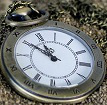

In [3]:
im = Image.open(f'{IMG}/clock.jpg')
im

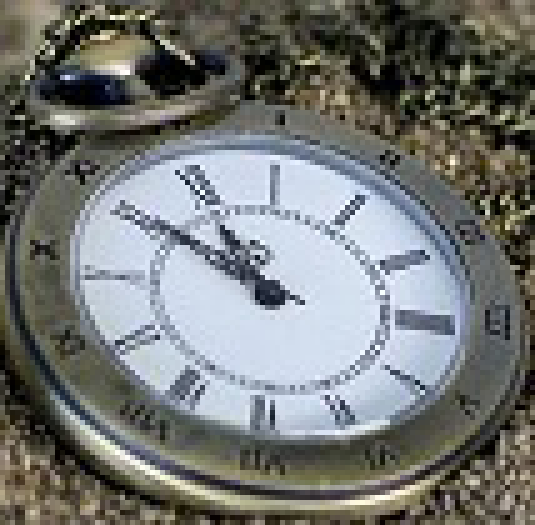

In [4]:
im1 = im.resize((im.width * 5, im.height * 5), Image.NEAREST)
im1 # very pixelated

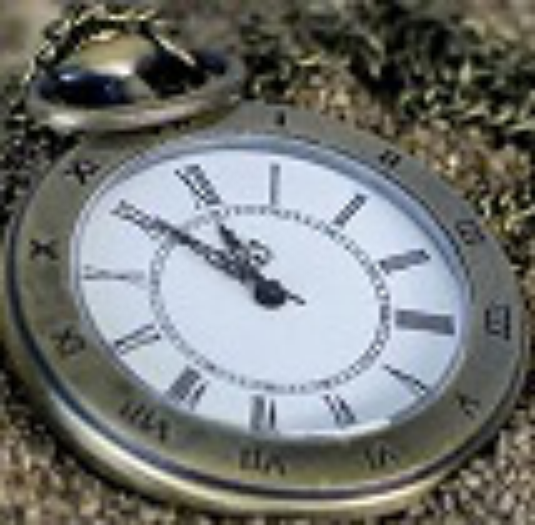

In [5]:
im2 = im.resize((im.width * 5, im.height * 5), Image.BILINEAR)
im2

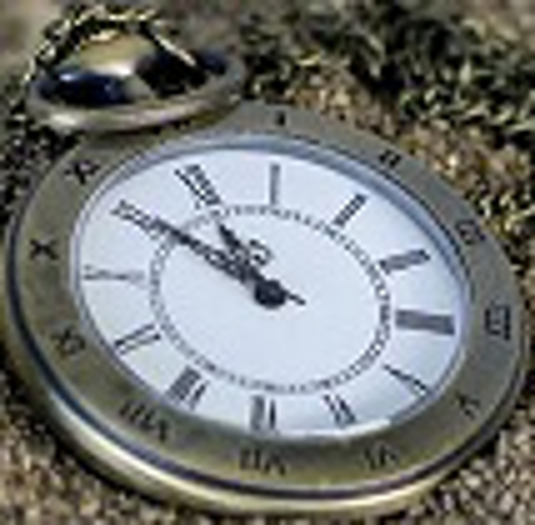

In [6]:
im3 = im.resize((im.width * 5, im.height * 5), Image.BICUBIC)
im3

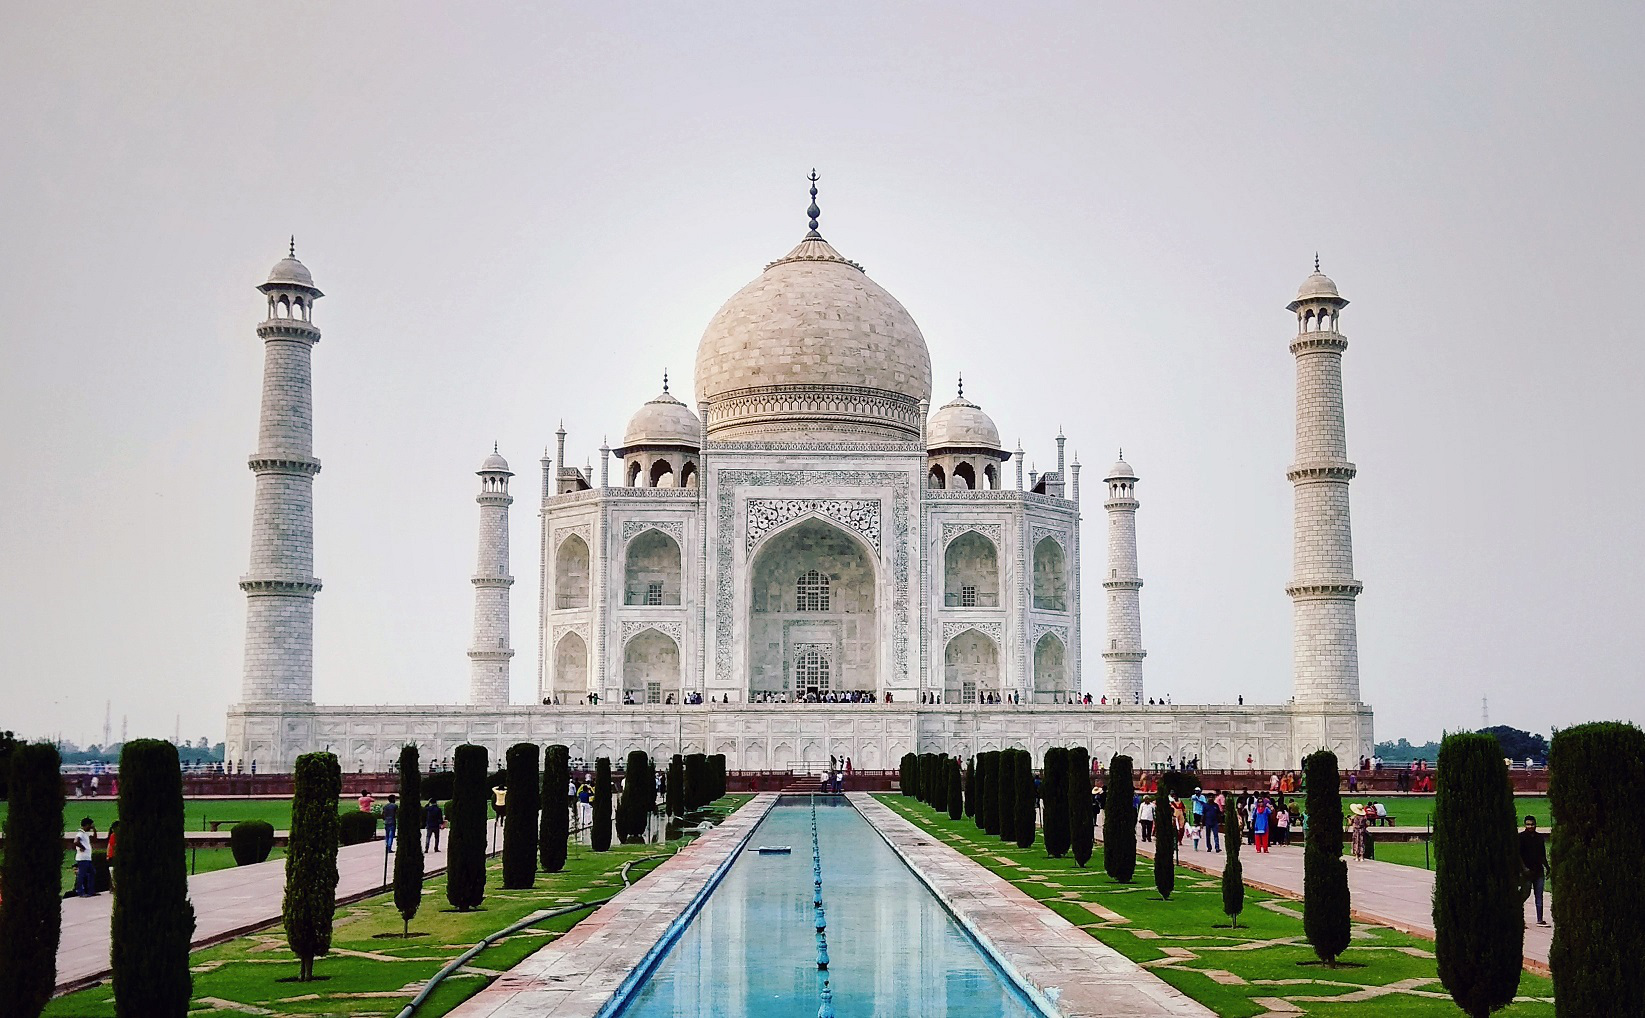

In [7]:
im = Image.open(f'{IMG}/tajmahal.jpg')
im

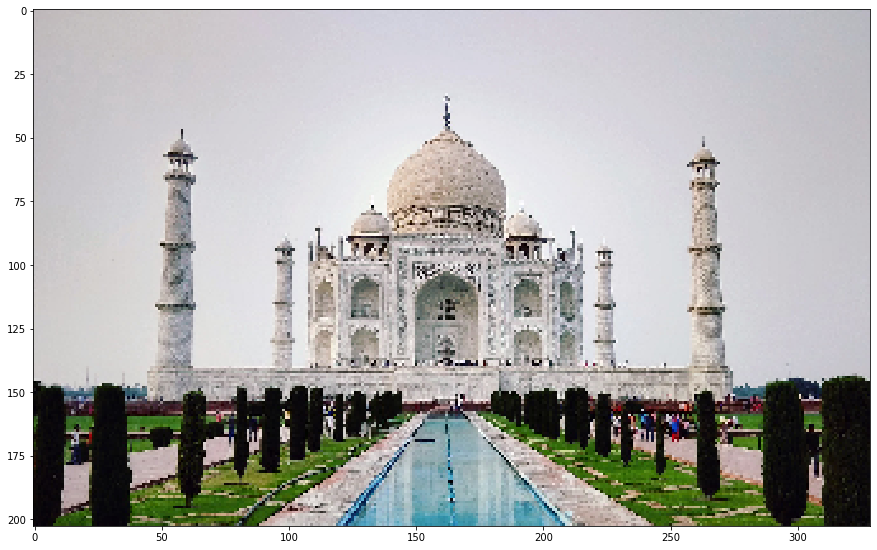

In [8]:
im2 = im.resize((im.width // 5, im.height // 5))
pylab.figure(figsize=(15, 10))
pylab.imshow(im2);

### Down Sampling with Anti-Aliasing

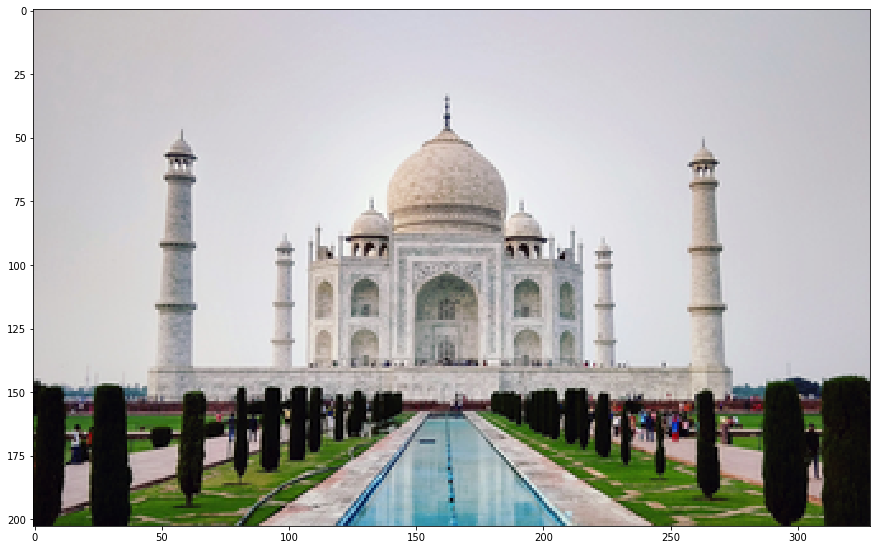

In [9]:
im3 = im.resize((im.width // 5, im.height // 5), Image.ANTIALIAS)
pylab.figure(figsize=(15, 10))
pylab.imshow(im3);

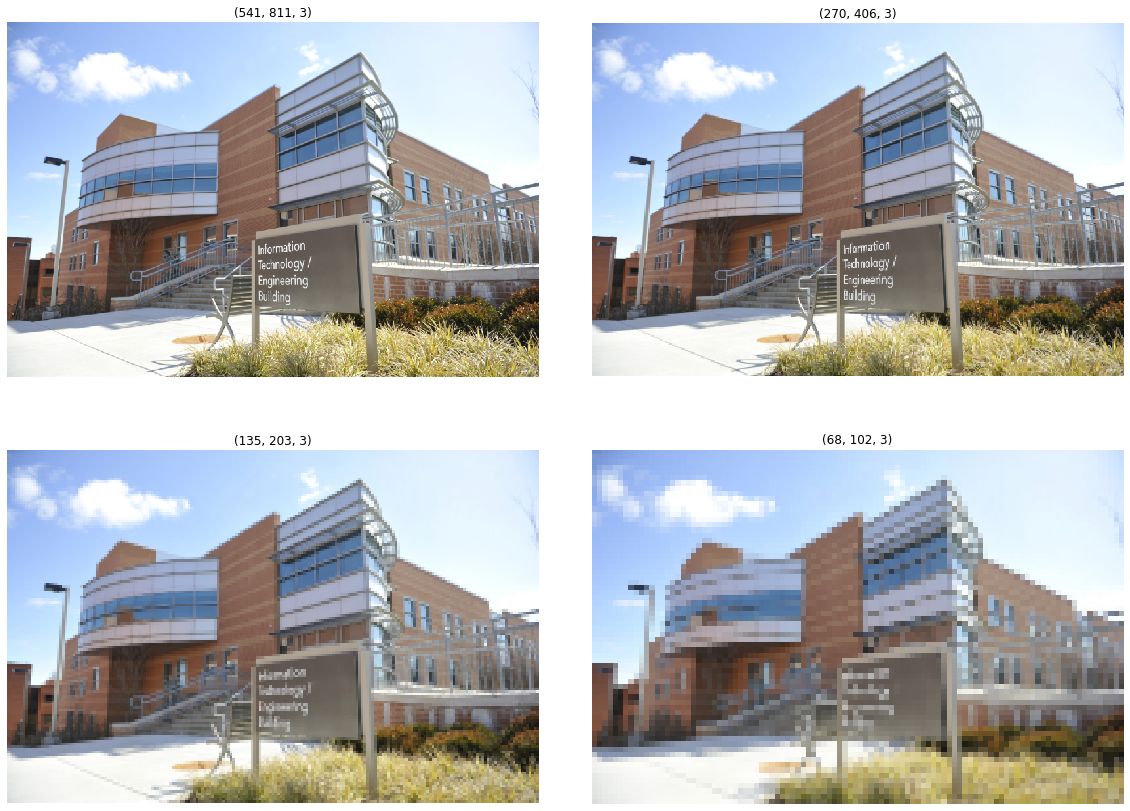

In [10]:
im = imread(f'{IMG}/umbc.png')
im1 = im.copy()
pylab.figure(figsize=(20, 15))
for i in range(4):
    pylab.subplot(2, 2, i + 1)
    pylab.imshow(im1, cmap='gray')
    pylab.axis('off')
    pylab.title(f'{str(im1.shape)}')
    im1 = rescale(im1, scale=0.5, multichannel=True, anti_aliasing=False)
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

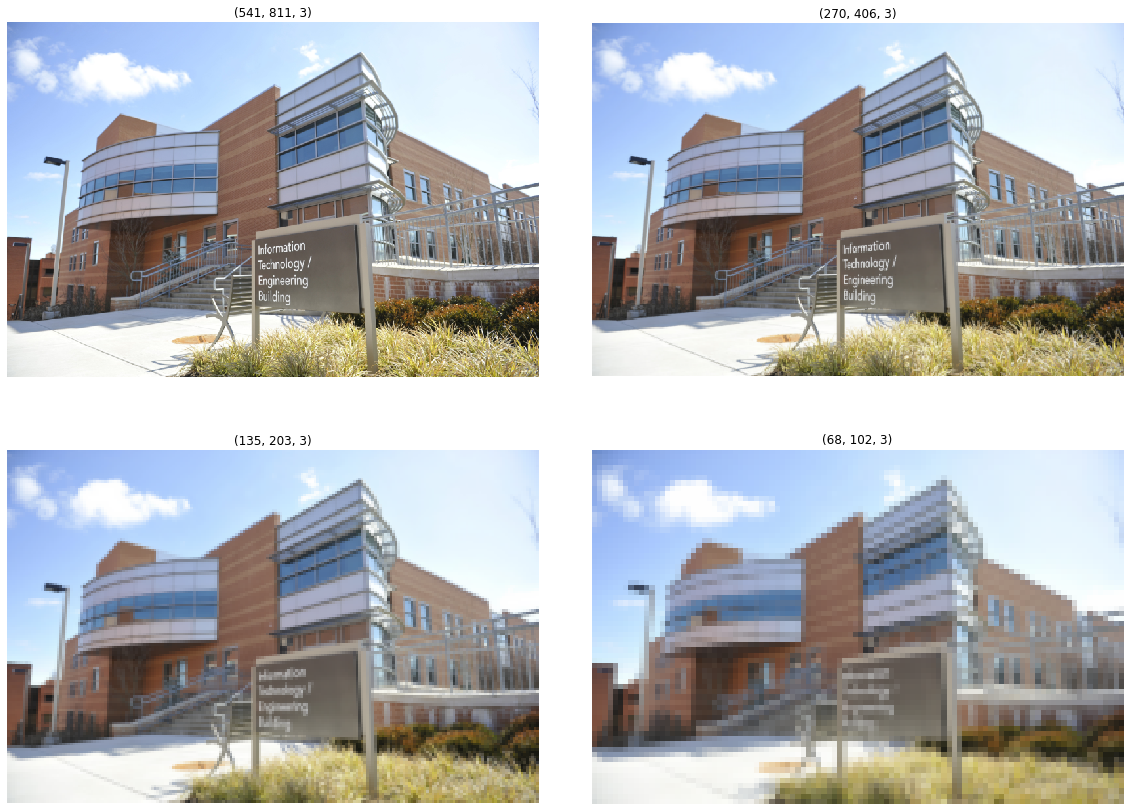

In [11]:
im = imread(f'{IMG}/umbc.png')
im1 = im.copy()
pylab.figure(figsize=(20, 15))
for i in range(4):
    pylab.subplot(2, 2, i + 1)
    pylab.imshow(im1, cmap='gray')
    pylab.axis('off')
    pylab.title(f'{str(im1.shape)}')
    im1 = rescale(im1, scale=0.5, multichannel=True, anti_aliasing=True)
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

### Quantization with PIL

In [12]:
n_color_list = [1 << n for n in range(8, 0, -1)]
n_color_list

[256, 128, 64, 32, 16, 8, 4, 2]

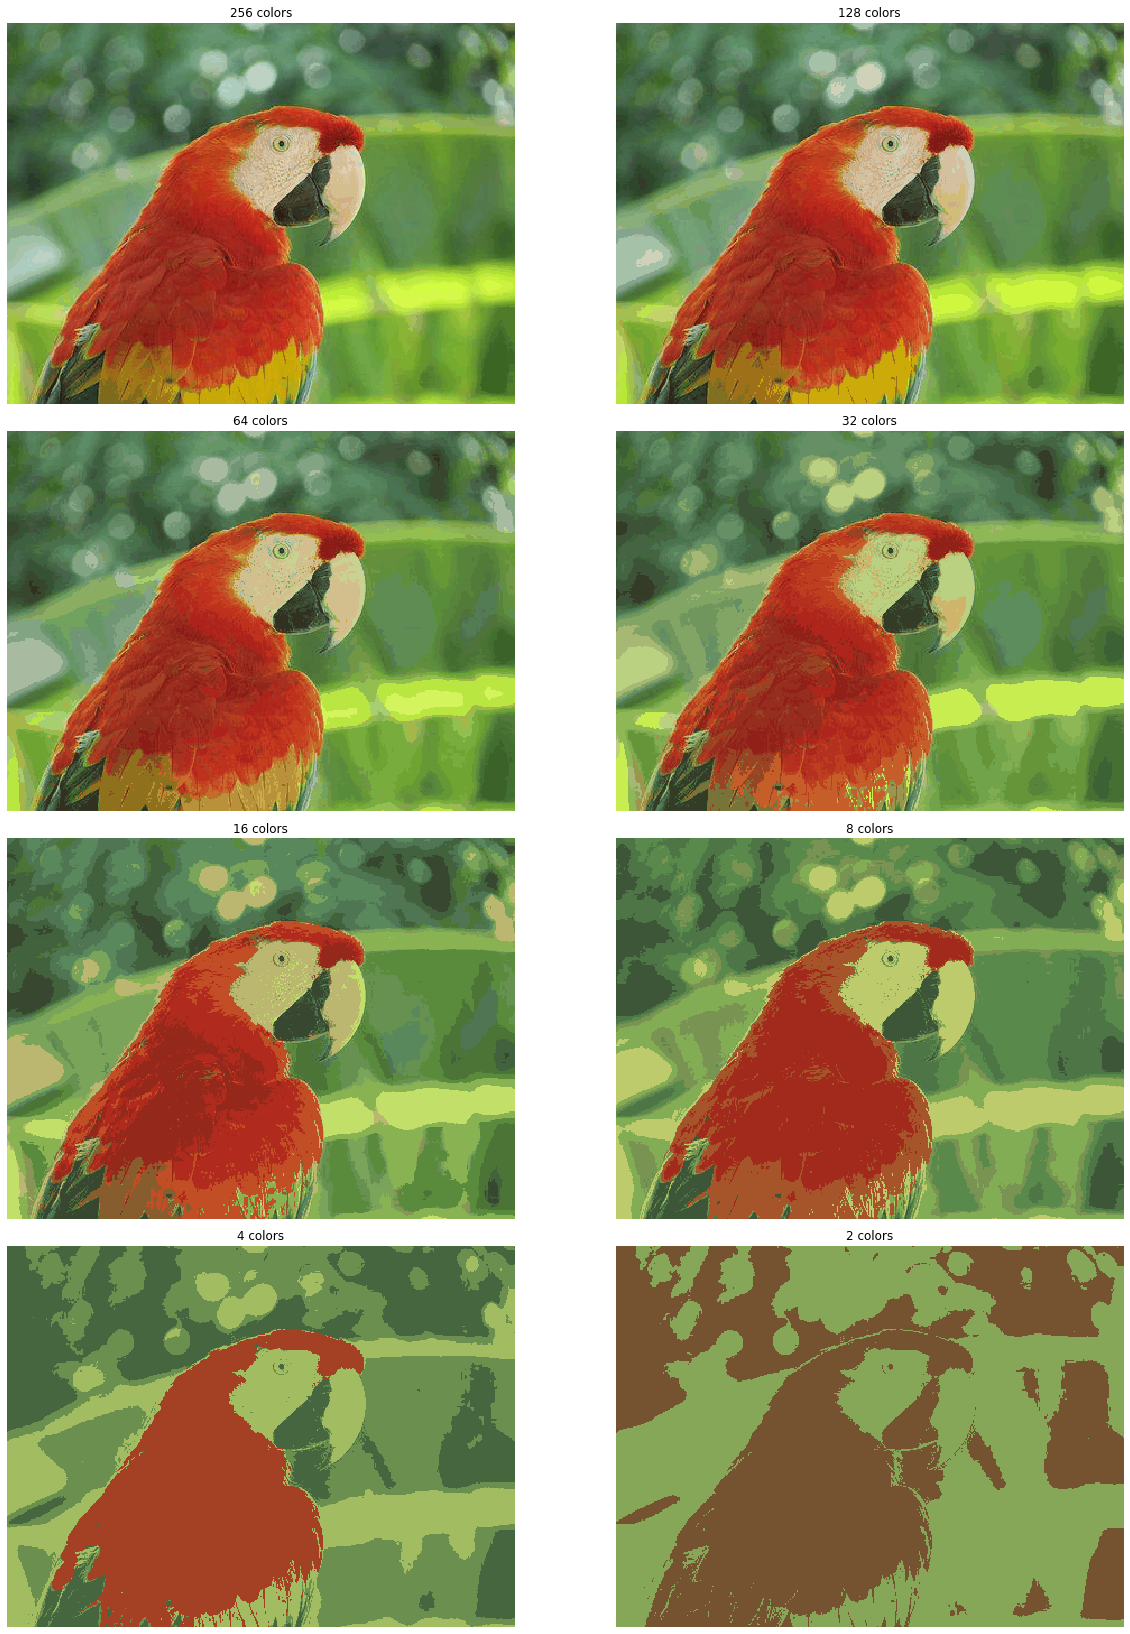

In [17]:
im = Image.open(f'{IMG}/parrot.png')
pylab.figure(figsize=(20, 30))
#snr_list = []
i = 1

for n_colors in n_color_list:
    im1 = im.convert('P', palette=Image.ADAPTIVE, colors=n_colors)
    pylab.subplot(4, 2, i)
    pylab.imshow(im1)
    pylab.axis('off')
    #snr_list.append(signaltonoise(im1, axis=None))
    pylab.title(f'{n_colors} colors')
    i += 1
pylab.subplots_adjust(wspace=0.2, hspace=0)